## 2. Importing libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Data set path

path = r"/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design"

In [8]:
# Import airbnb listings data (from exercise 6.3)

df = pd.read_csv(os.path.join(path, '02 data' , 'Prepared Data' , 'amsterdam_listings_relationships.csv'))

## 3. Data cleaning

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights

In [11]:
df.head(20)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2818,https://www.airbnb.com/rooms/2818,20250302144653,2025-03-03,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,...,4.98,4.73,4.80,0363 5F3A 5684 6750 D14D,f,1,0,1,0,2.05
1,1,27886,https://www.airbnb.com/rooms/27886,20250302144653,2025-03-03,previous scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,...,4.92,4.89,4.77,0363 974D 4986 7411 88D8,f,1,0,1,0,1.84
2,2,28871,https://www.airbnb.com/rooms/28871,20250302144653,2025-03-03,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,...,4.94,4.94,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.83
3,3,29051,https://www.airbnb.com/rooms/29051,20250302144653,2025-03-03,city scrape,Comfortable single room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.67
4,4,44391,https://www.airbnb.com/rooms/44391,20250302144653,2025-03-03,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.24
5,5,48373,https://www.airbnb.com/rooms/48373,20250302144653,2025-03-03,previous scrape,Cozy family home in Amsterdam South,Charming modern apartment in the quiet and gre...,Apartment is located between Amsterdamse Bos a...,https://a0.muscache.com/pictures/miso/Hosting-...,...,5.00,4.60,5.00,0363 4A2B A6AD 0196 F684,f,1,1,0,0,0.25
6,6,49552,https://www.airbnb.com/rooms/49552,20250302144653,2025-03-03,city scrape,Multatuli Luxury Guest Suite in top location,Stylish & spacious 60m2 guest suite in Amsterd...,You will find yourself in a quiet side street ...,https://a0.muscache.com/pictures/a6d6d2ee-3196...,...,4.97,4.98,4.78,0363 576A D827 5085 6B83,f,1,1,0,0,3.31
7,7,50263,https://www.airbnb.com/rooms/50263,20250302144653,2025-03-03,city scrape,Cent Adam de Lux 2 bedrooms (4p) apt 125 sqm,A beautiful 'De Lux' 125 sqm apartment for 4 a...,The house is located in a green park where no...,https://a0.muscache.com/pictures/677876/7cb949...,...,4.77,4.67,4.76,0363 7F3D 0BAE 28C8 C7D2,f,1,1,0,0,0.95
8,8,50515,https://www.airbnb.com/rooms/50515,20250302144653,2025-03-03,city scrape,"Family Home (No drugs, smoking or parties)",This is a beautiful family home in a lovely pa...,Our neighborhood is a lovely part of Amsterdam...,https://a0.muscache.com/pictures/3ff93cac-38e0...,...,4.89,4.56,4.78,0363 5DDB E495 A6D5 CEC6,f,1,1,0,0,0.14
9,9,50523,https://www.airbnb.com/rooms/50523,20250302144653,2025-03-02,city scrape,B & B de 9 Straatjes (city center),B&B “De 9 Straatjes” – Your home in the heart ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,...,4.83,4.94,4.83,0363 22DC 0E52 B70B 0FB8,f,1,1,0,0,2.99


In [12]:
df.shape

(10075, 80)

In [13]:
# Create a reduced DataFrame with only the required columns
# I want to explore the question: 'Do listings that accommodate more people tend to be more expensive?'

df_accommodates_price = df[['accommodates', 'price']].copy()

In [14]:
# Rename the columns in the same way as in Exercise 6.2.

df_accommodates_price.rename(columns={
    'accommodates': 'Accommodates',
    'price': 'Price per night'
}, inplace=True)

##### Missing values

In [16]:
# Check for missing values

df_accommodates_price.isnull().sum()

# 4164 missing values found! (Price per night)

Accommodates          0
Price per night    4164
dtype: int64

##### Fill missing values in 'Price per night' with the median

In [18]:
# Fill missing 'Price per night' values with the median

df_accommodates_price['Price per night'] = df_accommodates_price['Price per night'].fillna(
    df_accommodates_price['Price per night'].median()
)

In [19]:
# Check again for missing values
df_accommodates_price.isnull().sum()

# No missing values anymore!

Accommodates       0
Price per night    0
dtype: int64

##### Duplicates check

In [21]:
# Check for duplicate rows
dups = df_accommodates_price.duplicated()
print("Number of duplicates:", dups.sum())

# I chose to keep duplicate rows in the dataset because they reflect realistic combinations 
# of the number of guests accommodated and nightly price. For example, many listings may have 
# the same price for accommodating the same number of people. Removing duplicates could distort 
# the actual distribution and patterns we want to analyze in this regression.

Number of duplicates: 8561


##### Extreme values checks

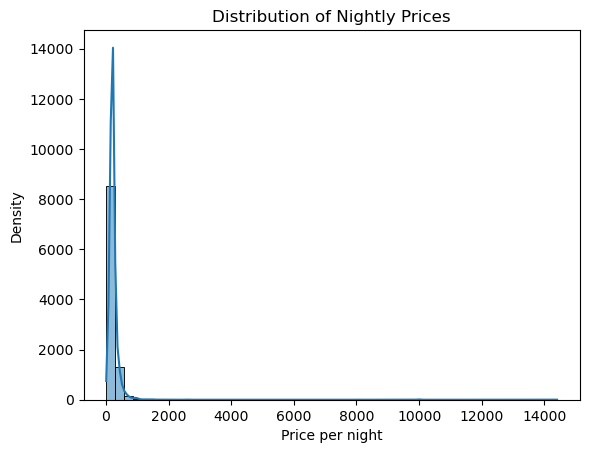

In [23]:
# 1. Explore price distribution and check for extreme values

# Plot histogram with KDE (Kernel Density Estimate) to check for outliers
sns.histplot(df_accommodates_price['Price per night'], bins=50, kde=True)
plt.xlabel('Price per night')
plt.ylabel('Density')
plt.title('Distribution of Nightly Prices')

# Define file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/distribution_nightly_prices.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Now display the plot
plt.show()

# Some of the outliers in the high price range may need to be removed later,
# but for now, we will keep them to see how they affect the regression.

In [24]:
df_accommodates_price['Price per night'].mean()  # Check the mean

241.92307692307693

In [25]:
df_accommodates_price['Price per night'].median() # Check the median

209.0

In [26]:
df_accommodates_price['Price per night'].max() # Check the max

14404.0

### Interpretation:

- **Mean > Median** → This shows that the data set is **right-skewed** (many cheaper listings, a few very expensive ones).
- **Max = €14,404** → Most likely an **outlier** (e.g. luxury villa) that **pulls the mean upwards**.
- The difference of approx. **€33** between mean and median is **noticeable**, but not dramatic – I’ll keep the values for now and later test how strongly these outliers influence the regression.

## 4. Visual exploration - Data prep for regression analysis

##### 1. Scatterplot

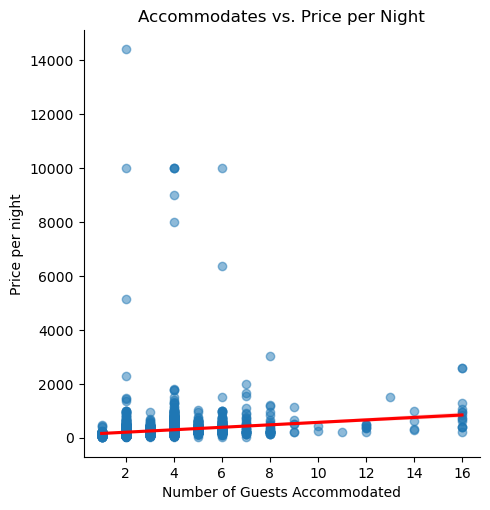

In [83]:
# 1. No transformation is needed for 'Accommodates' — it's already numeric.
# We want to explore the question:
# "Does the number of guests a listing can accommodate influence the nightly price?"

# 2. Create a scatterplot with a regression line
sns.lmplot(
    data=df_accommodates_price,
    x="Accommodates",
    y="Price per night",
    scatter_kws={"alpha": 0.5},   # Makes the dots slightly transparent
    line_kws={"color": "red"}     # Regression line in red
)

# Add a title and axis labels
plt.title("Accommodates vs. Price per Night")
plt.xlabel("Number of Guests Accommodated")
plt.ylabel("Price per night")

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/accommodates_vs_price.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Now show the plot
plt.show()


##### 2. Boxplot

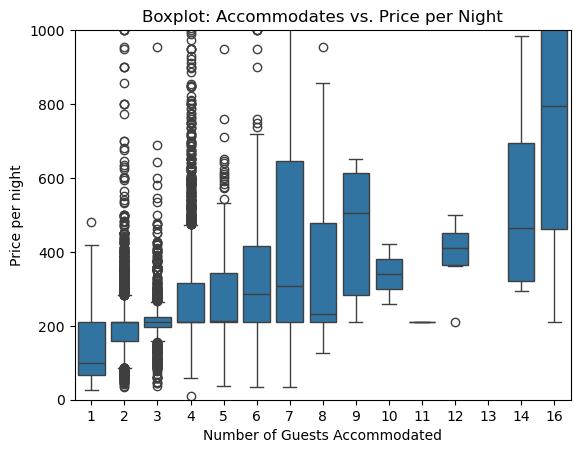

In [85]:
# Create a boxplot to compare price distributions across different guest capacities
sns.boxplot(data=df_accommodates_price, x='Accommodates', y='Price per night')

# Add axis labels and title
plt.xlabel('Number of Guests Accommodated')
plt.ylabel('Price per night')
plt.title('Boxplot: Accommodates vs. Price per Night')

# Optional: Limit y-axis to focus on typical price range (e.g., exclude extreme outliers)
plt.ylim(0, 1000)

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/accommodates_boxplot.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


### Findings: Visual Exploration of *Accommodates* vs. *Price per Night*

To explore whether listings that accommodate more guests tend to charge more per night, I first created a scatterplot with a regression line. The plot revealed a wide range of prices for all accommodation sizes. Due to several extreme outliers (e.g., listings priced above €10,000), the y-axis scale was stretched, which made the regression line appear relatively flat. This suggests only a weak visible linear relationship at first glance.

To gain better insight, I created an additional boxplot. Boxplots are more effective for comparing price distributions across different group sizes. This visualization showed that the **median price generally increases with the number of guests accommodated**, especially for listings that can host more than 4 people. However, each group contains a significant number of outliers, and the price spread within each category remains large.

**In summary**, the visual analysis indicates a **positive trend**: listings that accommodate more people tend to charge higher prices. Still, the **large number of outliers and overlapping price ranges** suggest that *Accommodates* alone may not be a strong predictor of price, but it contributes to the overall pricing pattern.

## 5. Hypothesis: Does Superhost Status Influence Price?

### 5. Hypothesis: Does Number of Guests Influence Price?

#### Hypothesis

**Research Question:**  
Do listings that accommodate more guests tend to have higher nightly prices?

**Hypothesis (H1):**  
Listings that can accommodate a greater number of guests charge a higher average price per night.

**Null Hypothesis (H0):**  
There is no difference in the average nightly price between listings based on the number of guests they accommodate.


## 6. Preparing X and y: Reshape Variables into NumPy Arrays

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects

# X = independent variable (Number of guests accommodated)
# y = dependent variable (Price per night)
X = df_accommodates_price['Accommodates'].values.reshape(-1, 1)
y = df_accommodates_price['Price per night'].values.reshape(-1, 1)

In [38]:
X

array([[2],
       [2],
       [2],
       ...,
       [3],
       [2],
       [6]])

In [39]:
y

array([[ 66.],
       [209.],
       [ 75.],
       ...,
       [138.],
       [126.],
       [214.]])

## 7. Splitting the Data into Training and Test Sets

In [41]:
from sklearn.model_selection import train_test_split

# Split data into a training set and a test set.
# 70% of the data will be used to train the model,
# and 30% will be used to test its performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8. Regression Analysis: Fit the Model to the Training Data

In [43]:
from sklearn.linear_model import LinearRegression

# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

## 9. Visualizing the Regression Line on the Test Set

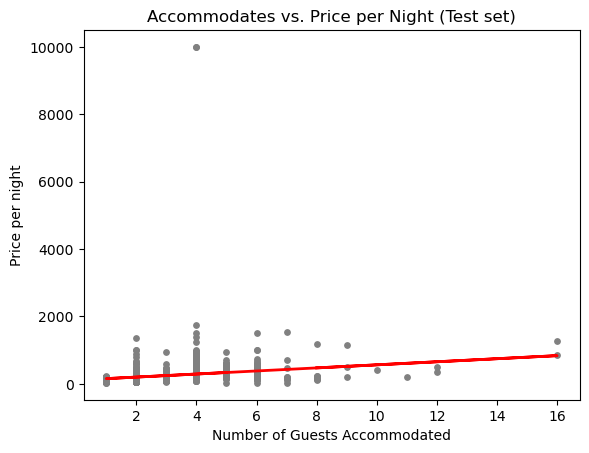

In [87]:
# Predict the values of y using X_test
y_predicted = regression.predict(X_test)

# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)          # Actual values (ground truth)
plot_test.plot(X_test, y_predicted, color='red', linewidth=2)  # Regression line (predictions)
plot_test.title('Accommodates vs. Price per Night (Test set)')
plot_test.xlabel('Number of Guests Accommodated')
plot_test.ylabel('Price per night')

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/test_set_regression.jpg"

# Save the figure BEFORE showing it
plot_test.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Now display the plot
plot_test.show()


## 10. Visual Evaluation: How Well Does the Line Fit the Data?

- The regression line on the test set shows a slight upward trend, which suggests a weak positive linear relationship between the number of guests accommodated and nightly price.

- Since the independent variable (*Accommodates*) is numeric and represents capacity, the regression line reflects how price tends to increase with each additional guest. However, the relatively small slope and large spread of data points indicate that the relationship is not particularly strong.

- Visually, the data points show a wide spread around the line, especially due to the presence of many outliers (e.g., very expensive listings). This indicates that the model’s predictions may not be very accurate and that *Accommodates* alone is not a strong predictor of price, though it may contribute to overall pricing patterns.

## 11. Model Performance: Mean Squared Error and R² Score

In [49]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
slope = regression.coef_

# Print the model evaluation results
print("Slope (price difference per additional guest):", slope)
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 4))

Slope (price difference per additional guest): [[45.47271835]]
Mean Squared Error (MSE): 77036.21
R² Score: 0.0406


## 12. Interpretation of Model Performance

The regression model results indicate that *Accommodates* (number of guests) has **limited predictive power** regarding nightly price.

- The **slope** of the regression line is approximately **€45.47**, meaning that for each additional guest accommodated, the model predicts the price to increase by about €45 on average. This aligns with expectations but should be interpreted with caution due to the wide spread in the data.

- The **Mean Squared Error (MSE)** is very high (**€77,036.21**), indicating that the predicted prices differ substantially from the actual values.

- The **R² Score** is very low (**0.0406**), meaning the model explains **only about 4.1% of the variation** in nightly price. This shows that *Accommodates* alone is not sufficient to model price accurately.

These findings suggest that while there may be a general upward trend, *Accommodates* by itself is not a strong predictor of price. Other variables – such as location, room type, number of beds, amenities, or review scores – are likely to have a **much stronger influence** and should be included in future models.

## 13. Reflections on Model Performance and Data Bias

The model performed poorly on the test set. With an R² score of **0.0406**, the model explains only about **4.1% of the variation** in nightly price. The high Mean Squared Error (MSE) also indicates that the predicted values deviate substantially from the actual prices. This suggests that *Accommodates* alone is not a reliable predictor of nightly price.

One possible reason for the limited model performance is the narrow focus on a **single variable**. While the number of guests a listing can accommodate is logically connected to price, it likely does not capture other important pricing factors — such as **location, room type, number of beds, or amenities**.

Additionally, the presence of **extreme outliers** in the price data may have skewed the model results. Although some exploratory cleaning was done, further steps — such as **removing or capping extremely high prices** — could improve the model’s accuracy and reduce the distortion caused by luxury listings.

Finally, there may be **biases in the dataset** itself. For instance, listings that accommodate many guests may be overrepresented in certain neighbourhoods or listing categories, or they may be affected by **promotional pricing, seasonality**, or **minimum stay requirements**. Without controlling for these factors, it is difficult to draw fully reliable conclusions from this model.

In [54]:
# Export the cleaned and prepared dataset to the correct folder

# Export data to csv

df_accommodates_price.to_csv(os.path.join(path, '02 Data','Prepared Data', 'accommodates_price_analysis.csv'))